# Import required libraries

In [38]:
!pip install wordcloud

import pandas as pd
import numpy as np
import warnings
import regex as re
warnings.filterwarnings('ignore')#to filter all the warnings
import seaborn as sns
pd.set_option('float_format', '{:.4f}'.format)# to keep the float values short
# Import for wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#import fot plotly
import plotly.express as px

# Data Description

YouTube Trending Statistics - Consists of updated daily records of top trending YouTube videos, based on viewership metrics such as likes, dislikes and views and provides interesting parameters such as tag or country for further analysis.

File type: csv
video_id: Uniquely identifies each video
published_at: Date and Time of video published
categoryId: Id of category the video belongs to
trending_date: Date and time when the video got to Trending
view_count: Number of views (cumulative)
likes: Number of Likes(cumulative)
dislikes: Number of dislikes(cumulative)
comment_count: Number of comments(cumulative)
country: Country in which the video was trending
description: Description of video by the creator
tags: Tags of the video by the creator
title: Title of the video
channelTitle: Channel Title of the video
thumbnail_link:link for thumbnails
comments_disabled: boolean value that defines if viewer can comment
ratings_disabled: boolean value that defines if viewer can rate through likes and dislikes
channelId: uniquely defines the channel the video is coming from

File type: json
id: Id of category the video belongs to
name: Respective category names of category ids

# Module 2: Data Preprocessing

### Data Viewing 

In [39]:
US_Videos_df = pd.read_csv('USvideos.csv')
US_Videos_df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...


### Opening JSON file and loading the required data to match categoryId to its respective category name:

In [40]:
import json #import data using python json module
with open('US_category_id.json','r') as f:
    category_data_us= json.loads(f.read())

In [41]:
#Since JSON file was in nested format we used json normalize function from pandas to flatten it and read into data frame
# Assuming the category data for each country is already loaded into respective variables
US_cat = pd.json_normalize(category_data_us, record_path='items')

In [42]:
# Converting the 'id' extracted from the json file to type 'int'
US_cat['id']= US_cat['id'].astype(int)


In [43]:
#Merging videos dataframe and category dataframe for all countries using left join
US_Videos_df = US_Videos_df.merge(US_cat, how='left', left_on='category_id', right_on='id').rename(columns={'snippet.title': 'category_name'})

In [44]:
#  Adding a column 'country' to identify country specific information after appending the 3 countries - USA, Great Britain, Canada
US_Videos_df['country']= 'USA'

In [45]:
df = US_Videos_df

In [46]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,ratings_disabled,video_error_or_removed,description,kind,etag,id,snippet.channelId,category_name,snippet.assignable,country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True,USA
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,False,False,"One year after the presidential election, John...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3...",24,UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True,USA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/G9LHzQmx44rX2S5ya...",23,UCBR8-60-B28hp2BmDPdntcQ,Comedy,True,USA
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,False,False,Today we find out if Link is a Nickelback amat...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3...",24,UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True,USA
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,False,False,I know it's been a while since we did this sho...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3...",24,UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,...,False,False,The Cat Who Caught the Laser - Aaron's Animals,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True,USA
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,...,False,False,NaN,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True,USA
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,...,False,False,I had so much fun transforming Safiyas hair in...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3...",24,UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True,USA
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,...,False,False,How Black Panther Should Have EndedWatch More ...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True,USA


In [47]:
df.shape

(40949, 23)

In [48]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'kind', 'etag', 'id',
       'snippet.channelId', 'category_name', 'snippet.assignable', 'country'],
      dtype='object')

# Data Cleaning 

In [49]:
#Dropping columns that are irrelevant for analysis:
df.drop(columns=['thumbnail_link','kind','etag','id','snippet.assignable','snippet.channelId'], axis='columns').shape
# safely dropped without disturbing the rows

(40949, 17)

In [50]:
# using inplace = true parameter with drop
df.drop(columns=['thumbnail_link','kind','etag','id','snippet.assignable',\
                 'snippet.channelId'], axis='columns',inplace=True)

In [51]:
df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,USA


### Data coherency

Finding if there are any True values in comments_disabled and ratings_disabled columns, which represents that comment_count is 0 if comments_disabled is True, and likes ,dislikes should be 0 if ratings_disabled is True¶

In [52]:
df[df.comments_disabled==True]['comment_count']

31       0
103      0
290      0
372      0
483      0
        ..
40549    0
40624    0
40631    0
40832    0
40839    0
Name: comment_count, Length: 633, dtype: int64

In [53]:
df[df.ratings_disabled==True][['likes','dislikes']]

,likes,dislikes
1435,0,0
1667,0,0
1868,0,0
1914,0,0
2081,0,0
...,...,...
28135,0,0
28346,0,0
28550,0,0
28751,0,0


In [54]:
df[df.comments_disabled==True].comment_count.sum()

0

In [55]:
df[df.ratings_disabled==True][['likes','dislikes']].sum()

likes       0
dislikes    0
dtype: int64

The records with True values in Comments_disabled and ratings_disabled have 0 corresponding values(likes, dislikes,comment_count).Hence the data is coherent and it is safe to drop the above 2 columns¶

In [56]:
df.drop(columns=['comments_disabled','ratings_disabled'],axis=1,inplace=True)

In [57]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,video_error_or_removed,description,category_name,country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,USA
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,"One year after the presidential election, John...",Entertainment,USA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,USA
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,Today we find out if Link is a Nickelback amat...,Entertainment,USA
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,I know it's been a while since we did this sho...,Entertainment,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,False,The Cat Who Caught the Laser - Aaron's Animals,Pets & Animals,USA
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,False,NaN,People & Blogs,USA
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,False,I had so much fun transforming Safiyas hair in...,Entertainment,USA
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,False,How Black Panther Should Have EndedWatch More ...,Film & Animation,USA


### Check for Null Values

In [58]:
df.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
video_error_or_removed      0
description               570
category_name               0
country                     0
dtype: int64

In [59]:
# Replace missing descriptions with "No description"
df['description'] = df['description'].fillna("No description")

In [60]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,video_error_or_removed,description,category_name,country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,USA
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,"One year after the presidential election, John...",Entertainment,USA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,USA
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,Today we find out if Link is a Nickelback amat...,Entertainment,USA
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,I know it's been a while since we did this sho...,Entertainment,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,False,The Cat Who Caught the Laser - Aaron's Animals,Pets & Animals,USA
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,False,No description,People & Blogs,USA
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,False,I had so much fun transforming Safiyas hair in...,Entertainment,USA
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,False,How Black Panther Should Have EndedWatch More ...,Film & Animation,USA


In [61]:
# I keep the non-english words in this dataset

# Data Transformation

### Converting Datatypes for Analysis
#### 1. Convert to datetime format and remove time zones 2. convert country to category


In [62]:
df.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
video_error_or_removed      bool
description               object
category_name             object
country                   object
dtype: object

In [63]:
df['publish_time'] = pd.to_datetime(df['publish_time']).dt.tz_localize(None)
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['country']= df['country'].astype('category')
df.dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
publish_time              datetime64[ns]
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
video_error_or_removed              bool
description                       object
category_name                     object
country                         category
dtype: object

In [64]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,video_error_or_removed,description,category_name,country
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,USA
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,"One year after the presidential election, John...",Entertainment,USA
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,USA
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,Today we find out if Link is a Nickelback amat...,Entertainment,USA
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,I know it's been a while since we did this sho...,Entertainment,USA


### Data Correctness

In [65]:
# Dropping records with likes > view_count
df[df.likes>df.views].sum()

video_id                 0.0000
title                    0.0000
channel_title            0.0000
category_id              0.0000
tags                     0.0000
views                    0.0000
likes                    0.0000
dislikes                 0.0000
comment_count            0.0000
video_error_or_removed   0.0000
description              0.0000
category_name            0.0000
dtype: float64

In [66]:
df.reset_index(drop=True, inplace=True)

In [67]:
# df.to_csv('/Users/chenyidan/Downloads/df.csv', index=False)

In [68]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,video_error_or_removed,description,category_name,country
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,USA
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,"One year after the presidential election, John...",Entertainment,USA
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,USA
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,Today we find out if Link is a Nickelback amat...,Entertainment,USA
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,I know it's been a while since we did this sho...,Entertainment,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,False,The Cat Who Caught the Laser - Aaron's Animals,Pets & Animals,USA
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18 01:00:06,[none],1064798,60008,382,3936,False,No description,People & Blogs,USA
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,False,I had so much fun transforming Safiyas hair in...,Entertainment,USA
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17 17:00:04,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,False,How Black Panther Should Have EndedWatch More ...,Film & Animation,USA


### Now the dataset is cleaned and ready for exploration

# Data Analysis and Statistics

       category_id          views        likes     dislikes  comment_count
count   40949.0000     40949.0000   40949.0000   40949.0000     40949.0000
mean       19.9724   2360784.6383   74266.7024    3711.4009      8446.8037
std         7.5683   7394113.7597  228885.3382   29029.7059     37430.4870
min         1.0000       549.0000       0.0000       0.0000         0.0000
25%        17.0000    242329.0000    5424.0000     202.0000       614.0000
50%        24.0000    681861.0000   18091.0000     631.0000      1856.0000
75%        25.0000   1823157.0000   55417.0000    1938.0000      5755.0000
max        43.0000 225211923.0000 5613827.0000 1674420.0000   1361580.0000


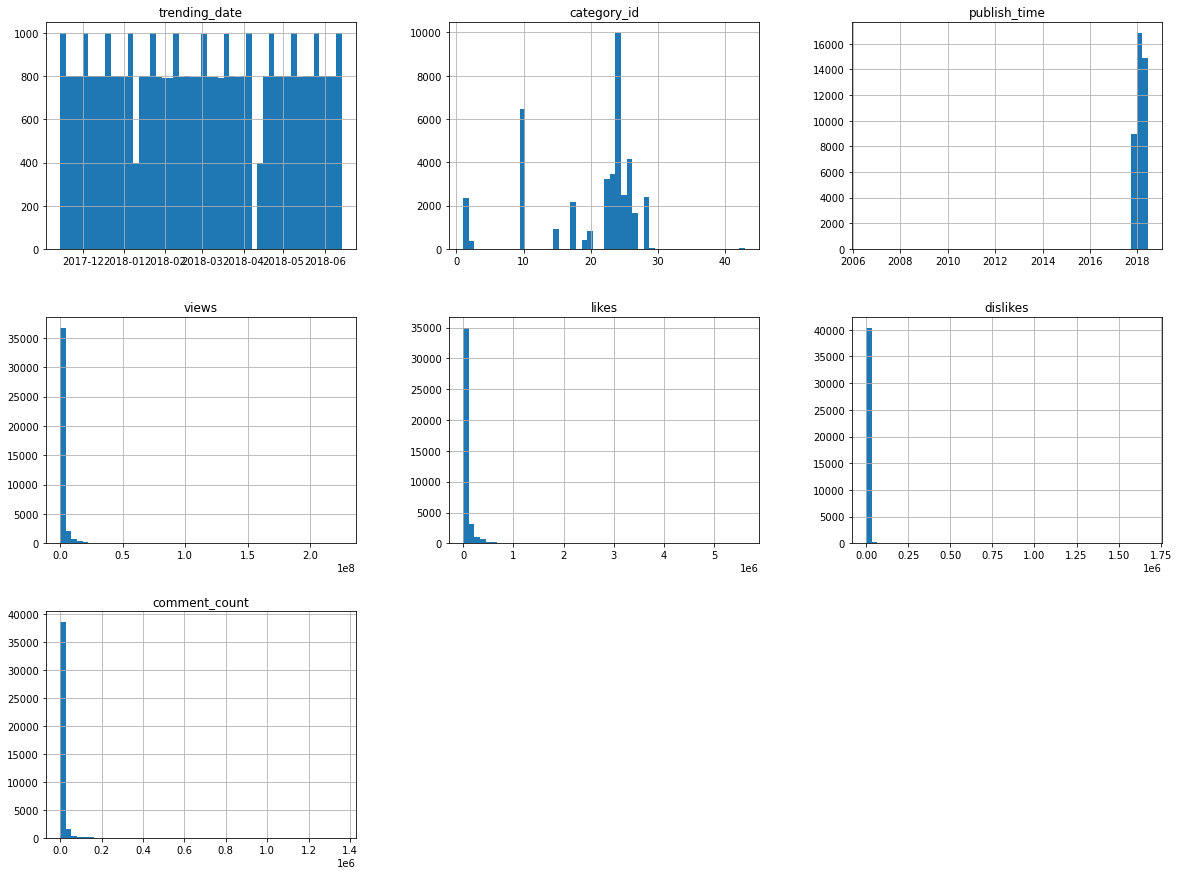

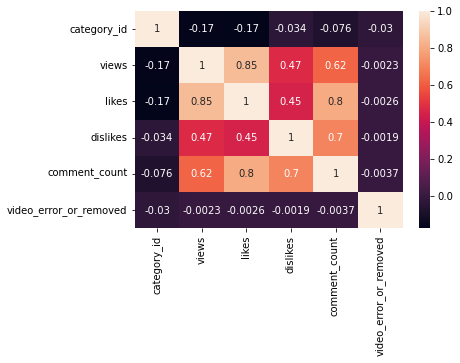

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistical summary
print(df.describe())

# Histograms or boxplots for distribution of numerical columns
df.hist(bins=50, figsize=(20,15))
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Nonprofits & Activism      57
Shows                      57
Name: category_name, dtype: int64
                             views       likes   dislikes  comment_count
category_name                                                           
Autos & Vehicles      1355965.4089  11056.3958   632.8385      2042.8307
Comedy                1480308.4200  62582.2233  2091.5218      6521.7188
Education              712940.8152  29745.0314   816.4082      3286.3780
Entertainment         2067883.1990  53243.3251  4314.2978      7383.2294
Film & Animation      3106250.2009  70787.8362  

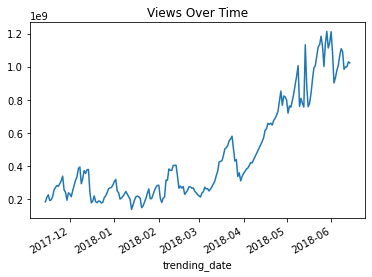

In [70]:
# Most popular categories
popular_categories = df['category_name'].value_counts()
print(popular_categories)

# Average views, likes, dislikes, and comment_count by category
average_metrics_by_category = df.groupby('category_name')['views', 'likes', 'dislikes', 'comment_count'].mean()
print(average_metrics_by_category)

# Trends over time
df.groupby('trending_date')['views'].sum().plot(kind='line')
plt.title('Views Over Time')
plt.show()



<AxesSubplot:xlabel='count', ylabel='category_name'>

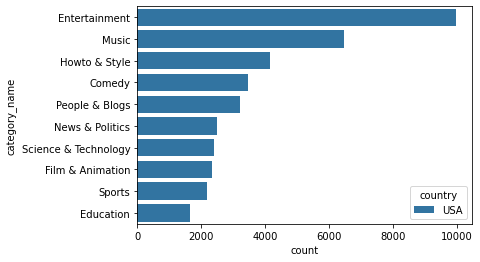

In [71]:
sns.countplot(y='category_name',data=df,hue='country',\
              order=df.category_name.value_counts().iloc[:10].index)

entertainment and musicare most popular and we want to analyze what topics are people mostly interested in by using wordcloud. Wordcloud generation failed

In [72]:
!pip install wordcloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# To increase the figure size
plt.rcParams['figure.figsize'] = [10, 5]

from wordcloud import WordCloud, STOPWORDS


def generate_wordcloud(text, stop_words):
    wordcloud = WordCloud(
        stopwords=stop_words,
        max_font_size=50, 
        max_words=150, 
        background_color="white"
        # Removed the font_path argument
    ).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Example usage
stopwords = set(STOPWORDS)
stopwords.update(['follow', 'twitter', 'social', 'instagram', 'subscribe', 'snapchat', 'youtube', 'videos', 'video', 
                  'channel', 'share', 'facebook', 'comment', 'like', 'take', 'go', 'got', 'back', 
                  'much', 'made', 'keep', 'watch', 'none', 'check', 'will', 'make'])

In [73]:
category_list = ['Entertainment', 'Music']

In [74]:
for category in category_list:
    print("Category: " + category)
    # Extracting tags and titles where category_name matches the category
    tag_text = " ".join(text for text in df.tags[df.category_name == category])
    title_text = " ".join(text for text in df.title[df.category_name == category])
    
    # Combining tags and titles for the word cloud
    tag_title_text = tag_text + ' ' + title_text
    generate_wordcloud(tag_title_text, stopwords)


Category: Entertainment


ValueError: Only supported for TrueType fonts

Investigate the peak from May to June 2018 shown in the time series graph

In [75]:
# Investigating the peak in views from May 2018 to June 2018
df_peak = df.loc[(df['trending_date'] >= '2018-05-01') & (df['trending_date'] <= '2018-06-14')]
df_peak

# Analyzing the top videos in terms of views during this period
top_videos_peak_period = df_peak.groupby(['video_id', 'title', 'channel_title', 'category_name','publish_time']).agg({
    'views': 'sum'
}).sort_values(by='views', ascending=False).head(10)

top_videos_peak_period.reset_index()



,video_id,title,channel_title,category_name,publish_time,views
0,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,3758488765
1,7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,1283188291
2,ffxKSjUwKdU,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,1057426403
3,xTlNMmZKwpA,"Cardi B, Bad Bunny & J Balvin - I Like It [Off...",Cardi B,Music,2018-05-29 14:05:10,896558471
4,zEf423kYfqk,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,Music,2018-04-20 10:40:51,878139569
5,ulNswX3If6U,Selena Gomez - Back To You (Lyric Video),Selena Gomez,Film & Animation,2018-05-10 16:00:11,818792483
6,vjI4Alon-3Q,Maluma - Marinero (Official Video),MalumaVEVO,Music,2018-05-04 10:00:33,803455479
7,DkeiKbqa02g,"Calvin Harris, Dua Lipa - One Kiss (Official V...",CalvinHarrisVEVO,Music,2018-05-02 23:01:00,792843004
8,u9Mv98Gr5pY,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,2018-04-24 03:45:03,736596294
9,n_W54baizX8,Daddy Yankee - Hielo (Video Oficial),Daddy Yankee,Music,2018-05-18 14:00:04,735203270


Ariana Grande, BTS Childish Gambino songs streaming on youtube is the main reason that 

# Predictive modelling

## Time Series forecasting
### forecasting views for each category

In [76]:
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt

In [77]:
from statsmodels.tsa.stattools import adfuller
df1 = df[['views', 'likes', 'comment_count', 'category_id']]

# Perform ADF Test on the 'views' column to check for stationarity
result = adfuller(df1['views'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -17.112423
p-value: 0.000000


P value is zero, the data is stationary 

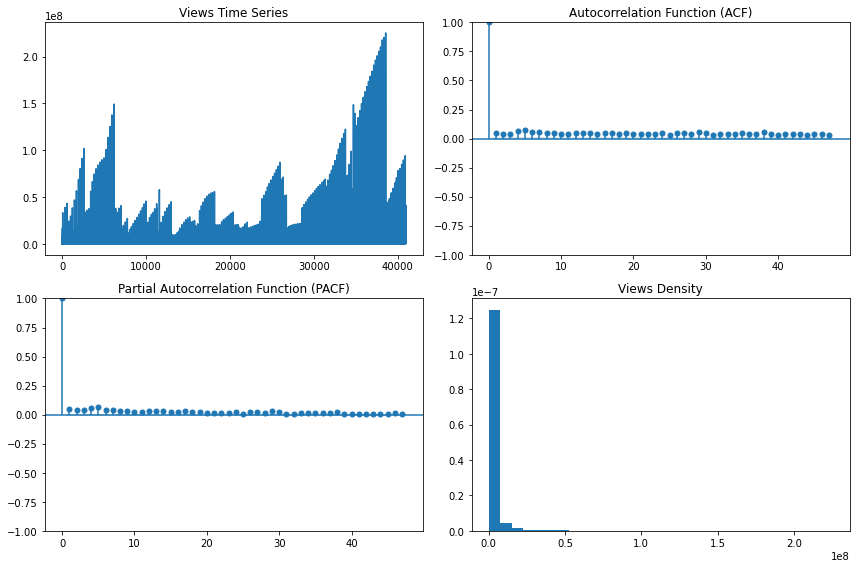

In [78]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=False)

# Plotting 'views' in the first panel
axes[0, 0].plot(df1['views'].index, df1['views'])
axes[0, 0].set_title('Views Time Series')

# Plotting ACF in the second panel
plot_acf(df1['views'].dropna(), ax=axes[0, 1])
axes[0, 1].set_title('Autocorrelation Function (ACF)')

# Plotting PACF in the third panel
plot_pacf(df1['views'].dropna(), ax=axes[1, 0])
axes[1, 0].set_title('Partial Autocorrelation Function (PACF)')

# Optionally, you can plot something else or leave the fourth panel empty
# For example, plotting the density
axes[1, 1].hist(df1['views'].dropna(), bins=30, density=True)
axes[1, 1].set_title('Views Density')

plt.tight_layout()
plt.show()


In [79]:
# Function to forecast using auto_arima
def forecast_metric(metric_series, n_periods=30):
    auto_model = auto_arima(metric_series, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
    train = metric_series[:-n_periods]
    model = ARIMA(train, order=auto_model.order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=n_periods)
    return forecast

# Forecasting views for each category
categories = df1['category_id'].unique()
forecast_results = {}

for category_id in categories:
    print(f'\nProcessing category ID: {category_id}')
    category_data = df1[df1['category_id'] == category_id]['views']

 # Forecasting
    forecast = forecast_metric(category_data)
    forecast_results[category_id] = forecast

# Results
forecast_results


Processing category ID: 22
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=107715.499, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=106880.747, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=105571.397, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=107713.499, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=105570.606, Time=0.57 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=105559.531, Time=0.73 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=106492.965, Time=0.20 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=105553.657, Time=1.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=106286.164, Time=0.24 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=105517.000, Time=1.35 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=106157.069, Time=0.30 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=105489.012, Time=1.47 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=106070.317

/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(



Processing category ID: 24
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=345393.928, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=342238.046, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=345391.928, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=341005.608, Time=0.56 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=340539.113, Time=0.71 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=340191.369, Time=0.88 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=339967.916, Time=1.33 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=5.85 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.69 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=339965.916, Time=1.16 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=340189.369, Time=0.80 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=5.68 sec
 ARIMA(4,1,1

/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(



Processing category ID: 23
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=110010.963, Time=1.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=112190.415, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=111194.811, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=110071.986, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=112188.415, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=110026.740, Time=1.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=110061.416, Time=0.96 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=109866.410, Time=3.33 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=110047.605, Time=1.21 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=110004.560, Time=1.61 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=110001.319, Time=1.77 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=109996.918, Time=3.27 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=110023.273, Time=1.57 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=109

/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(



Processing category ID: 28
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=78582.425, Time=1.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=80624.881, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=79910.190, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=78818.803, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=80622.881, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=78589.398, Time=1.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=78755.405, Time=0.48 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=78581.625, Time=2.56 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=78747.222, Time=0.77 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=78698.035, Time=2.10 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=78506.763, Time=2.54 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=78515.351, Time=1.94 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=78502.093, Time=2.92 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=78491.739, Time=

/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(



Processing category ID: 1
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=79236.684, Time=1.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=81032.958, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=80245.227, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=79287.498, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=81030.958, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=79176.071, Time=1.72 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=79248.845, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=79266.644, Time=0.41 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=79231.037, Time=1.11 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=79239.900, Time=0.51 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=79263.761, Time=0.63 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=79237.097, Time=3.53 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=79160.058, Time=1.57 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=79245.624, Time=0

/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(



Processing category ID: 25
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=75668.508, Time=2.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=77011.231, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=76633.555, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=75772.611, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=77009.231, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=75687.144, Time=2.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=75706.183, Time=1.85 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=75618.367, Time=1.38 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=75674.213, Time=1.01 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=75608.578, Time=2.34 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=75658.554, Time=1.71 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=75533.120, Time=5.94 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=75576.166, Time=2.40 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=75581.736, Time=

/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836


Processing category ID: 17
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=72080.383, Time=2.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=73687.252, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=73122.275, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=72216.386, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=73685.252, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=72170.583, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=72205.223, Time=0.59 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=72159.176, Time=0.69 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=72152.269, Time=0.94 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=72215.924, Time=0.54 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=72075.525, Time=2.90 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=72151.687, Time=0.58 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=2.84 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=72182.432, Time=0.39 s

/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(



Processing category ID: 10
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.72 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=236503.720, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=234758.879, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=236501.720, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=233840.511, Time=0.40 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=233495.338, Time=0.58 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=233264.363, Time=0.66 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=233106.787, Time=0.72 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.74 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.03 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=233104.788, Time=0.86 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=233262.364, Time=0.77 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=3.48 sec
 ARIMA(4,1,1

/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(



Processing category ID: 15
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=27667.988, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=28604.473, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=28389.946, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=27889.653, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=28602.475, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=27889.950, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=27730.496, Time=0.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=27663.600, Time=0.43 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=27686.998, Time=0.23 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=27665.627, Time=0.75 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=27645.643, Time=0.72 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=27684.489, Time=0.48 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=27651.388, Time=0.84 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=27650.346, Time=

/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836


Processing category ID: 27
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.92 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=50922.866, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=50445.106, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=49801.829, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=50920.867, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=49798.558, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=49795.564, Time=0.38 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=50289.134, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=49778.576, Time=0.52 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=50224.862, Time=0.16 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=49709.605, Time=0.63 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=50155.545, Time=0.20 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=49604.515, Time=0.73 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=49981.309, Time=0.30 s

/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836


Processing category ID: 26
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=131513.812, Time=2.01 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=134114.373, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=133049.954, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=131589.432, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=134112.373, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=131521.166, Time=0.74 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=131586.876, Time=1.03 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=131431.788, Time=6.34 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=131578.780, Time=2.40 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=6.80 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=7.28 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=131487.384, Time=7.94 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=131537.041, Time=2.44 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=131480.872, Time=

/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(



Processing category ID: 2
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12357.473, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12577.968, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12579.832, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12579.443, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12575.969, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12441.511, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12418.663, Time=0.09 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=12358.272, Time=0.53 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=12357.538, Time=0.48 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12482.399, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=12434.959, Time=0.22 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=12412.405, Time=0.18 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=12361.943, Time=1.09 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=12355.421, Time=0

/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(



Processing category ID: 19
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=12762.652, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12846.445, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=12840.330, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=12842.558, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=12742.987, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=12832.310, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=12764.679, Time=0.13 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=12722.957, Time=0.17 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=12832.935, Time=0.08 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=12720.922, Time=0.26 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=12711.944, Time=0.37 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=12739.788, Time=0.24 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=12678.243, Time=0.51 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=12741.328, Time=

/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(



Processing category ID: 20
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=26525.154, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=27083.654, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26930.053, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26588.783, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=27081.663, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=26567.688, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=26567.646, Time=0.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=26547.666, Time=0.28 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=26538.183, Time=1.52 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=26586.546, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=26528.649, Time=0.60 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=26555.014, Time=0.25 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=26563.974, Time=1.40 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=26506.831, Time=

/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836


Processing category ID: 29
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1891.840, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1970.900, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1887.882, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1937.752, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1888.896, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1889.224, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1889.652, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1889.254, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.271 seconds

Processing category ID: 43
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1489.796, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1481.611, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1483.264, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1483.421, Tim

/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1485.397, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.160 seconds


/Users/chenyidan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


{22: 3180   4183437.7200
 3181   4706184.6450
 3182   4996467.6604
 3183   5681566.8454
 3184   6059153.2263
 3185   6206096.8922
 3186   6258061.3329
 3187   6257751.2072
 3188   6195290.9861
 3189   6112210.5245
 3190   6035336.0067
 3191   5973115.2556
 3192   5927675.7628
 3193   5900283.9130
 3194   5888217.6999
 3195   5886946.1091
 3196   5892210.0714
 3197   5900593.4945
 3198   5909494.0056
 3199   5917263.9912
 3200   5923127.2444
 3201   5926932.0696
 3202   5928908.8992
 3203   5929485.5002
 3204   5929140.3518
 3205   5928303.8236
 3206   5927308.8730
 3207   5926378.3324
 3208   5925634.2176
 3209   5925119.1588
 Name: predicted_mean, dtype: float64,
 24: 9934   6895977.6946
 9935   7621280.3919
 9936   7659057.4548
 9937   8446209.7532
 9938   9382796.4152
 9939   7454268.8334
 9940   8009461.6585
 9941   8105321.4713
 9942   8123649.3430
 9943   8251915.0306
 9944   8208293.5544
 9945   8042868.8678
 9946   8132599.5869
 9947   8139622.9803
 9948   8144368.2812
 9949   

In [81]:
print(forecast_results)

{22: 3180   4183437.7200
3181   4706184.6450
3182   4996467.6604
3183   5681566.8454
3184   6059153.2263
3185   6206096.8922
3186   6258061.3329
3187   6257751.2072
3188   6195290.9861
3189   6112210.5245
3190   6035336.0067
3191   5973115.2556
3192   5927675.7628
3193   5900283.9130
3194   5888217.6999
3195   5886946.1091
3196   5892210.0714
3197   5900593.4945
3198   5909494.0056
3199   5917263.9912
3200   5923127.2444
3201   5926932.0696
3202   5928908.8992
3203   5929485.5002
3204   5929140.3518
3205   5928303.8236
3206   5927308.8730
3207   5926378.3324
3208   5925634.2176
3209   5925119.1588
Name: predicted_mean, dtype: float64, 24: 9934   6895977.6946
9935   7621280.3919
9936   7659057.4548
9937   8446209.7532
9938   9382796.4152
9939   7454268.8334
9940   8009461.6585
9941   8105321.4713
9942   8123649.3430
9943   8251915.0306
9944   8208293.5544
9945   8042868.8678
9946   8132599.5869
9947   8139622.9803
9948   8144368.2812
9949   8153313.8818
9950   8136907.9304
9951   812732

# Machine Learning Model

In [84]:
from sklearn.model_selection import train_test_split

In [86]:
x = df1[['views', 'comment_count']]
y = df1['likes']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=3)

### Multiple Linear Regression

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics


In [88]:
lm = LinearRegression()
lm.fit(x_train, y_train)      # Fitting model with x_train and y_train
lm_pred = lm.predict(x_test)  # Predicting the results
print('RMSE:', np.sqrt(mean_squared_error(y_test, lm_pred, squared=False)))
print('r2 score: %.2f' % r2_score(y_test, lm_pred))
print("Accuracy :",lm.score(x_test, y_test))

RMSE: 290.17527042631457
r2 score: 0.86
Accuracy : 0.8605859847738129


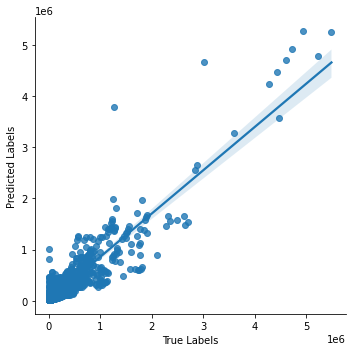

In [89]:
labels = {'True Labels': y_test, 'Predicted Labels': lm_pred}
df_lm = pd.DataFrame(data = labels)
sns.lmplot(x='True Labels', y= 'Predicted Labels', data = df_lm)

### Xgboost ( i did find code for this but does not understand)

In [97]:
! pip install xgboost
from xgboost import XGBRegressor

     |████████████████████████████████| 2.2 MB 2.5 MB/s eta 0:00:01


In [98]:
# simple XGboost
xgb = XGBRegressor()
xgb.fit(x_train, y_train)       # Fitting model with x_train and y_train
xgb_pred = xgb.predict(x_test)  # Predicting the results
print('RMSE:', np.sqrt(mean_squared_error(y_test, xgb_pred, squared=False)))
print('r2 score: %.2f' % r2_score(y_test, xgb_pred))
print("Accuracy :",xgb.score(x_test, y_test))


RMSE: 288.81047444062085
r2 score: 0.86
Accuracy : 0.8631903903188634


In [99]:
# Tuning XGBoost
xgb = XGBRegressor(n_estimators=5000, learning_rate=0.001)
xgb.fit(x_train, y_train)       # Fitting model with x_train and y_train
xgb_pred = xgb.predict(x_test)  # Predicting the results
print('RMSE:', np.sqrt(mean_squared_error(y_test, xgb_pred, squared=False)))
print('r2 score: %.2f' % r2_score(y_test, xgb_pred))
print("Accuracy :",xgb.score(x_test, y_test))

RMSE: 286.68895073133916
r2 score: 0.87
Accuracy : 0.8671661792686944


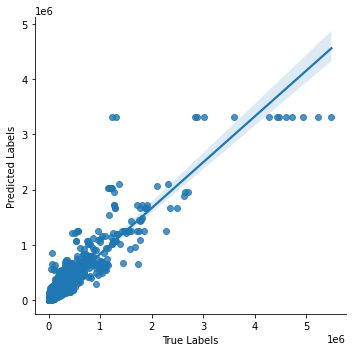

In [102]:
labels_xgb = {'True Labels': y_test, 'Predicted Labels': xgb_pred}
df_xgb = pd.DataFrame(data = labels_xgb)
sns.lmplot(x='True Labels', y= 'Predicted Labels', data = df_xgb)